# San Diego County Demographics
Cleaned by: Raymond Arevalo

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'


# 1. Clean Data

In [4]:
# grabbing data
df = pd.read_csv('../2012_San_Diego_Demographics_-_County_Population.csv')
area_zip_dict = pd.read_csv('../area_zip_dict.csv')

print(df.keys())


Index(['Region Number', 'Subregional Area Number', 'Area ',
       'Total 2012 Population', 'Population 0-4', 'Population 5-14 ',
       'Population 15-24', 'Population 25-44', 'Population 45-64 ',
       'Population 65+', 'Males', 'Females', 'White', 'Hispanic', 'Black',
       'Asian/Pacific Islander', 'Other Race/ Ethnicity'],
      dtype='object')


In [5]:
# grabbing necessary information
df = df[['Area ', 'Total 2012 Population', 'White', 'Hispanic', 'Black', 'Asian/Pacific Islander']]
print(df)

                   Area   Total 2012 Population    White  Hispanic   Black  \
0           San Dieguito                  95500    73992     13417     581   
1               Carlsbad                 117427    85260     17794    1566   
2              Oceanside                 161223    73383     62054    6459   
3              Pendleton                  38172    23295      8170    2910   
4                  Vista                 102080    43217     48887    2538   
5   North Coastal Region                 514402   299147    150322   14054   
6              Peninsula                  63252    47479      8649    2163   
7            Kearny Mesa                 152441    83559     34846    6484   
8                Coastal                  75893    60540      8482     784   
9             University                  68088    34483      7088    1225   
10     Del Mar-Mira Mesa                 160089    75851     16518    3498   
11               Miramar                   5072     3033      10

In [6]:
# Replacing naming of Areas to exclude space " " character
df['Area '] = [str(x.replace(" ","_")) for x in df['Area '][:]]
print(df.head(5))


          Area   Total 2012 Population  White  Hispanic  Black  \
0  San_Dieguito                  95500  73992     13417    581   
1      Carlsbad                 117427  85260     17794   1566   
2     Oceanside                 161223  73383     62054   6459   
3     Pendleton                  38172  23295      8170   2910   
4         Vista                 102080  43217     48887   2538   

   Asian/Pacific Islander  
0                    4506  
1                    8630  
2                   12576  
3                    1637  
4                    4305  


In [7]:
# Gets rid of the areas in df that aren't in area_zip_dict
keep = area_zip_dict['Area'].values
dfClean = df[df['Area '].isin(keep)]
print(dfClean)

            Area   Total 2012 Population  White  Hispanic  Black  \
1        Carlsbad                 117427  85260     17794   1566   
2       Oceanside                 161223  73383     62054   6459   
4           Vista                 102080  43217     48887   2538   
18       Coronado                  23187  16865      3328   1207   
19  National_City                  58752   6400     38066   2409   
21    Chula_Vista                 116603  20420     83820   3695   
24          Jamul                  18079   9693      5782    835   
25  Spring_Valley                  82215  38061     27450   7354   
26    Lemon_Grove                  30110   9231     13137   4156   
27        La_Mesa                  60320  37118     12755   4034   
28       El_Cajon                 126047  73306     34897   6701   
29         Santee                  51950  38123      8646    828   
30       Lakeside                  56951  41013     10989    963   
32         Alpine                  15226  11668 

In [8]:
dfList = dfClean['Area '].tolist()
print(dfList)

['Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook']


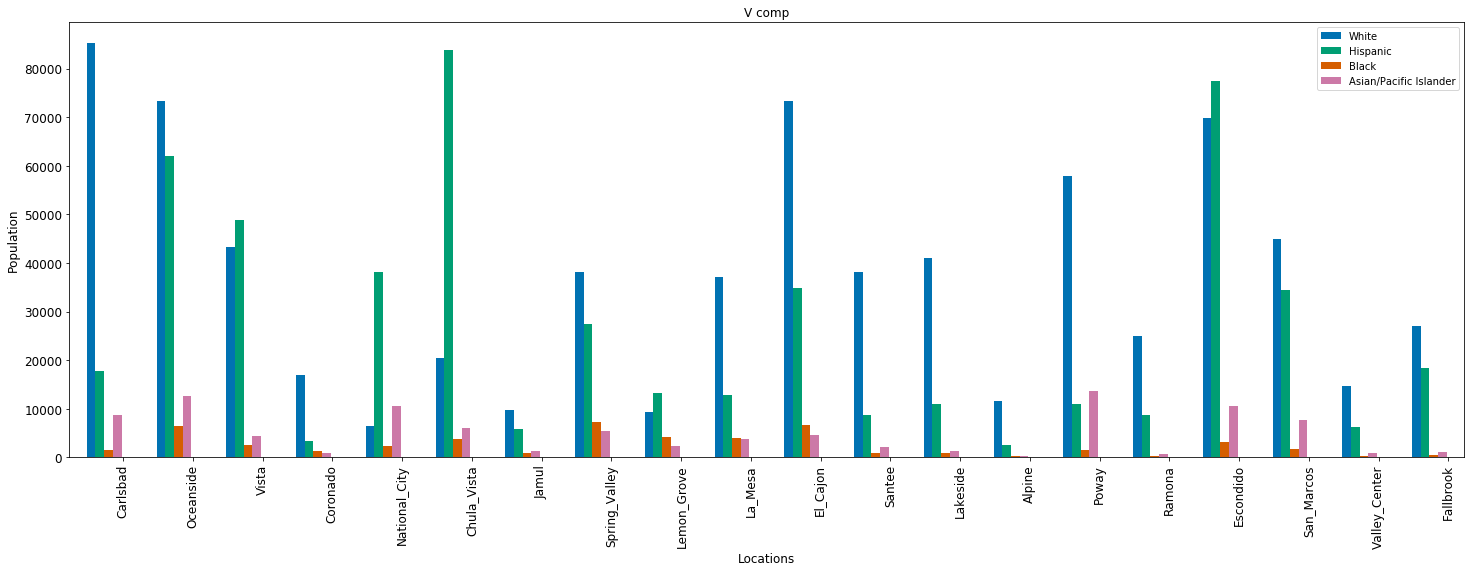

In [9]:
N = 20
ind = np.arange(N)
width = 0.27

ax = dfClean[['White','Hispanic', 'Black', 'Asian/Pacific Islander']].plot(kind='bar', title ="V comp", figsize=(25, 8), legend=True, fontsize=12)
ax.set_xlabel("Locations", fontsize=12)
ax.set_ylabel("Population", fontsize=12)
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook') )
plt.show()

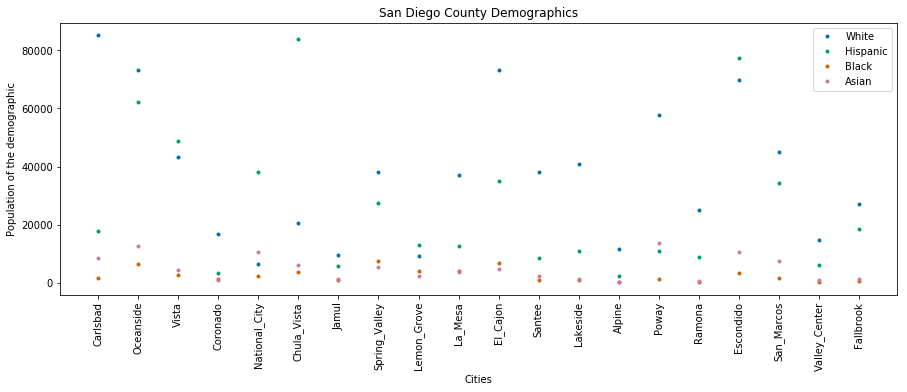

In [169]:
-




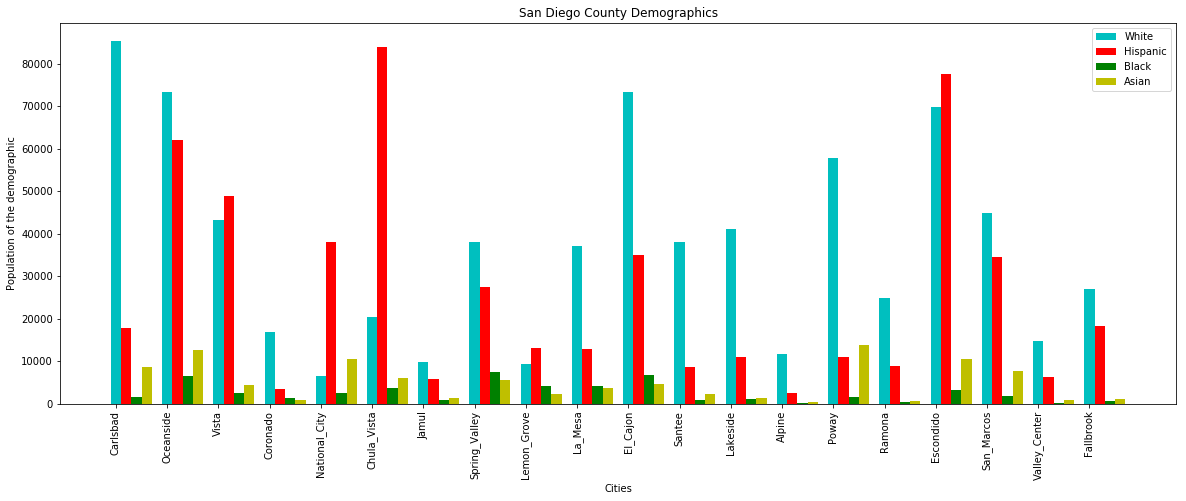

In [178]:

N = 20
ind = np.arange(N)
fig = plt.figure(1,figsize=(20,7))
ax = fig.add_subplot(111)
width = .20


ax.bar(ind+width*1, [item[0] for item in crimebread], width, color='c')
ax.bar(ind+width*2, [item[1] for item in crimebread], width, color='r')
ax.bar(ind+width*3, [item[2] for item in crimebread], width, color='g')
ax.bar(ind+width*4, [item[3] for item in crimebread], width, color='y')

ax.set_title('San Diego County Demographics')
ax.legend( ("White", "Hispanic", "Black", "Asian"))
ax.set_ylabel('Population of the demographic')
ax.set_xlabel('Cities')
ax.set_xticklabels(('Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook'), rotation='vertical')
ax.set_xticks(ind+width)

plt.show()



In [183]:
import matplotlib.pyplot as plt
import h5py
cogs108h5 = h5py.File('../COGS108-Gentrification/cogs108.h5', 'a')
cogs108h5.create_dataset('county_demographics', data = crimebread )
cogs108h5.close()